In [1]:
from pathlib import Path

from dask import dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pearl.post_processing.bmi import (
    add_overall,
    calc_risk_by_group,
    clean_control,
    group_title_dict,
)


In [ ]:
use_baseline = False
num_replications = 10000
num_samples = 10000

In [ ]:
if use_baseline:
    baseline = Path("/workspaces/pearlModel/out/S0_1000/combined")
    variable = Path("/workspaces/pearlModel/out/S3_1000/combined")
baseline_sa = Path("/workspaces/pearlModel/out/S0_SA_10000/combined")
variable_sa = Path("/workspaces/pearlModel/out/S3_SA_10000/combined")

In [4]:
target_columns = ['dm_prevalence_prev',
                  'dm_prevalence',
                  'dm_incidence',
                  'pre_art_bmi',
                  'post_art_bmi',
                  'art_initiators']

In [5]:
if use_baseline:
    param_df_baseline = pd.read_parquet(baseline / "parameters.parquet").reset_index(drop=True)
    param_df_variable = pd.read_parquet(variable / "parameters.parquet").reset_index(drop=True)
param_df_baseline_sa = pd.read_parquet(baseline_sa / "parameters.parquet").reset_index(drop=True)
param_df_variable_sa = pd.read_parquet(variable_sa / "parameters.parquet").reset_index(drop=True)

In [6]:
def add_overall_to_params(params):
    group = params['group'].unique()[1]
    overall = params[params['group']==group]
    overall['group'] = 'overall'
    params = pd.concat([params, overall])
    return params.reset_index(drop=True)

In [7]:
# add overall to params
if use_baseline:
    param_df_baseline = add_overall_to_params(param_df_baseline)
    param_df_variable = add_overall_to_params(param_df_variable)
param_df_baseline_sa = add_overall_to_params(param_df_baseline_sa)
param_df_variable_sa = add_overall_to_params(param_df_variable_sa)

/tmp/ipykernel_416259/2444569115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall['group'] = 'overall'
/tmp/ipykernel_416259/2444569115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall['group'] = 'overall'


### First lets look at the differences between the sensitivity analysis run and the unaltered runs in the S0 scenario

In [8]:
# load the baseline data
if use_baseline:
    bmi_int_dm_prev_baseline = dd.read_parquet(baseline / "dm_final_output.parquet")
bmi_int_dm_prev_baseline_sa = dd.read_parquet(baseline_sa / "dm_final_output.parquet")

In [9]:
# reduce to a manageable size
bmi_int_dm_prev_baseline_sa = bmi_int_dm_prev_baseline_sa[bmi_int_dm_prev_baseline_sa['replication'] < num_replications]

In [10]:
# add overall
if use_baseline:
    bmi_int_dm_prev_baseline = add_overall(bmi_int_dm_prev_baseline)
bmi_int_dm_prev_baseline_sa = add_overall(bmi_int_dm_prev_baseline_sa)

In [11]:
# clean to control specifications
if use_baseline:
    control_bmi_int_dm_prev_baseline = clean_control(bmi_int_dm_prev_baseline, only_eligible=True, only_received=True)
control_bmi_int_dm_prev_baseline_sa = clean_control(bmi_int_dm_prev_baseline_sa, only_eligible=True, only_received=True)

# filter for only people eligible for intervention
if use_baseline:
    bmi_int_eligible_risk_baseline = calc_risk_by_group(control_bmi_int_dm_prev_baseline, 7).compute()
bmi_int_eligible_risk_baseline_sa = calc_risk_by_group(control_bmi_int_dm_prev_baseline_sa, 7).compute()

In [12]:
if use_baseline:
    baseline_risk_median = bmi_int_eligible_risk_baseline.groupby('group')['risk'].median().reset_index()
    baseline_risk_median

In [13]:
baseline_risk_sa_median = bmi_int_eligible_risk_baseline_sa.groupby('group')['risk'].median().reset_index()
baseline_risk_sa_median

,group,risk
0,het_black_female,23.837694
1,het_black_male,19.996103
2,het_hisp_female,21.556945
3,het_hisp_male,18.853757
4,het_white_female,22.246446
5,het_white_male,18.103598
6,idu_black_female,27.320350
7,idu_black_male,15.136598
8,idu_hisp_female,28.341100
9,idu_hisp_male,9.653394


In [14]:
if use_baseline:
    ((baseline_risk_sa_median['risk'] - baseline_risk_median['risk']) / baseline_risk_median['risk']) * 100

### Let's do the same for the intervention run

In [15]:
# load the variable data
if use_baseline:
    bmi_int_dm_prev_variable = dd.read_parquet(variable / "dm_final_output.parquet")
bmi_int_dm_prev_variable_sa = dd.read_parquet(variable_sa / "dm_final_output.parquet")

# reduce to a manageable size
bmi_int_dm_prev_variable_sa = bmi_int_dm_prev_variable_sa[bmi_int_dm_prev_variable_sa['replication'] < num_replications]

# add overall
if use_baseline:
    bmi_int_dm_prev_variable = add_overall(bmi_int_dm_prev_variable)
bmi_int_dm_prev_variable_sa = add_overall(bmi_int_dm_prev_variable_sa)

In [16]:
# clean to control specifications
if use_baseline:
    control_bmi_int_dm_prev_variable = clean_control(bmi_int_dm_prev_variable, only_eligible=True, only_received=True)
control_bmi_int_dm_prev_variable_sa = clean_control(bmi_int_dm_prev_variable_sa, only_eligible=True, only_received=True)

# filter for only people eligible for intervention
if use_baseline:
    bmi_int_eligible_risk_variable = calc_risk_by_group(control_bmi_int_dm_prev_variable, 7).compute()
bmi_int_eligible_risk_variable_sa = calc_risk_by_group(control_bmi_int_dm_prev_variable_sa, 7).compute()

In [17]:
if use_baseline:
    variable_risk_median = bmi_int_eligible_risk_variable.groupby('group')['risk'].median().reset_index()
    variable_risk_median

In [18]:
variable_risk_sa_median = bmi_int_eligible_risk_variable_sa.groupby('group')['risk'].median().reset_index()
variable_risk_sa_median

,group,risk
0,het_black_female,18.867875
1,het_black_male,14.837246
2,het_hisp_female,17.575858
3,het_hisp_male,13.031948
4,het_white_female,18.218861
5,het_white_male,13.243704
6,idu_black_female,22.522927
7,idu_black_male,10.762153
8,idu_hisp_female,22.406602
9,idu_hisp_male,8.801380


In [19]:
if use_baseline:    
    ((variable_risk_sa_median['risk'] - variable_risk_median['risk']) / variable_risk_median['risk']) * 100

### Now let us look at the risk differences for non SA

In [20]:
if use_baseline:
    # gather samples from each non SA run
    baseline_risk = bmi_int_eligible_risk_baseline.groupby('group').sample(num_samples, replace=True).reset_index()
    variable_risk = bmi_int_eligible_risk_variable.groupby('group').sample(num_samples, replace=True).reset_index()

In [21]:
if use_baseline:
    # absolute difference
    risk_df = pd.DataFrame(variable_risk['risk'] - baseline_risk['risk'])

    # relative difference
    risk_df_relative = pd.DataFrame((variable_risk['risk'] - baseline_risk['risk'])/baseline_risk['risk'])

    # add back the group column that is lost
    risk_df['group'] = baseline_risk['group']
    risk_df_relative['group'] = baseline_risk['group']

In [22]:
if use_baseline:   
    # take the median across groups
    baseline_risk_difference_df = risk_df.groupby('group').median().reset_index()
    baseline_risk_difference_df_relative = risk_df_relative.groupby('group').median().reset_index()

In [23]:
if use_baseline:
    baseline_risk_difference_df

### And the same for SA

In [24]:
# gather samples from each SA run
baseline_risk_sa = bmi_int_eligible_risk_baseline_sa.groupby('group').sample(num_samples, replace=True).reset_index()
variable_risk_sa = bmi_int_eligible_risk_variable_sa.groupby('group').sample(num_samples, replace=True).reset_index()

In [25]:
# absolute difference
risk_df_sa = pd.DataFrame(variable_risk_sa['risk'] - baseline_risk_sa['risk'])

# relative difference
risk_df_sa_relative = pd.DataFrame((variable_risk_sa['risk'] - baseline_risk_sa['risk'])/baseline_risk_sa['risk'])

# add back the group column that is lost
risk_df_sa['group'] = baseline_risk_sa['group']
risk_df_sa_relative['group'] = baseline_risk_sa['group']

In [26]:
# take the median across groups
baseline_risk_difference_df_sa = risk_df_sa.groupby('group').median().reset_index()
baseline_risk_difference_df_sa_relative = risk_df_sa_relative.groupby('group').median().reset_index()

In [27]:
baseline_risk_difference_df_sa

,group,risk
0,het_black_female,-5.118545
1,het_black_male,-5.287001
2,het_hisp_female,-4.014613
3,het_hisp_male,-6.213275
4,het_white_female,-4.109686
5,het_white_male,-5.126863
6,idu_black_female,-4.818149
7,idu_black_male,-4.306141
8,idu_hisp_female,-6.063087
9,idu_hisp_male,-0.901142


### SA Tornado plots

In [28]:
def calc_tornado_vals(baseline_risk_df,
                      variable_risk_df,
                      param_df_baseline,
                      param_df_variable,
                      col_name,
                      num_samples=1000,
                      lesser=0.1,
                      greater=0.9):
    
    sub_param_baseline = param_df_baseline[['replication', 'group', col_name]]
    sub_param_variable = param_df_variable[['replication', 'group', col_name]]
    
    baseline_merged = sub_param_baseline.merge(baseline_risk_df, on=['replication', 'group'], how='right').fillna(0)
    variable_merged = sub_param_variable.merge(variable_risk_df, on=['replication', 'group'], how='right').fillna(0)
    
    quantile_val_baseline = baseline_merged.groupby('group')[col_name].quantile([lesser, greater]).unstack().reset_index()
    quantile_val_variable = variable_merged.groupby('group')[col_name].quantile([lesser, greater]).unstack().reset_index()
    
    difference_tornado_df = []
    relative_tornado_df = []
    baseline_tornado_df = []
    variable_tornado_df = []
    for group in quantile_val_baseline['group'].unique():
        group_df_baseline = baseline_merged[baseline_merged['group'] == group]
        group_df_variable = variable_merged[variable_merged['group'] == group]

        lesser_val_baseline = quantile_val_baseline[quantile_val_baseline['group'] == group][lesser].values[0]
        greater_val_baseline = quantile_val_baseline[quantile_val_baseline['group'] == group][greater].values[0]
        lesser_val_variable = quantile_val_variable[quantile_val_variable['group'] == group][lesser].values[0]
        greater_val_variable = quantile_val_variable[quantile_val_variable['group'] == group][greater].values[0]
        
        lesser_group_df_baseline = group_df_baseline[group_df_baseline[col_name] <= lesser_val_baseline]
        greater_group_df_baseline = group_df_baseline[group_df_baseline[col_name] >= greater_val_baseline]
        lesser_group_df_variable = group_df_variable[group_df_variable[col_name] <= lesser_val_variable]
        greater_group_df_variable = group_df_variable[group_df_variable[col_name] >= greater_val_variable]
        
        lesser_group_df_baseline_sample = lesser_group_df_baseline.sample(num_samples, replace=True).reset_index()
        greater_group_df_baseline_sample = greater_group_df_baseline.sample(num_samples, replace=True).reset_index()
        lesser_group_df_variable_sample = lesser_group_df_variable.sample(num_samples, replace=True).reset_index()
        greater_group_df_variable_sample = greater_group_df_variable.sample(num_samples, replace=True).reset_index()
        
        baseline_group_tornado_df = {
            'group': group,
            'variable': col_name,
            lesser: (lesser_group_df_baseline_sample['risk']).quantile([lesser,0.5,greater]),
            greater: (greater_group_df_baseline_sample['risk']).quantile([lesser,0.5,greater]),
            'lesser_count': lesser_group_df_baseline['risk'].count(),
            'greater_count': greater_group_df_baseline['risk'].count(),
        }
        baseline_tornado_df.append(baseline_group_tornado_df)
        variable_group_tornado_df = {
            'group': group,
            'variable': col_name,
            lesser: (lesser_group_df_variable_sample['risk']).quantile([lesser,0.5,greater]),
            greater: (greater_group_df_variable_sample['risk']).quantile([lesser,0.5,greater]),
            'lesser_count': lesser_group_df_variable['risk'].count(),
            'greater_count': greater_group_df_variable['risk'].count(),
        }
        variable_tornado_df.append(variable_group_tornado_df)
        difference_group_tornado_df = {
            'group': group,
            'variable': col_name,
            lesser: (lesser_group_df_variable_sample['risk'] - lesser_group_df_baseline_sample['risk']).quantile([lesser,0.5,greater]),
            greater: (greater_group_df_variable_sample['risk'] - greater_group_df_baseline_sample['risk']).quantile([lesser,0.5,greater])
        }
        difference_tornado_df.append(difference_group_tornado_df)
        
        relative_group_tornado_df = {
            'group': group,
            'variable': col_name,
            lesser: ((lesser_group_df_variable_sample['risk'] - lesser_group_df_baseline_sample['risk'])/lesser_group_df_baseline_sample['risk']).quantile([lesser,0.5,greater]),
            greater: ((greater_group_df_variable_sample['risk'] - greater_group_df_baseline_sample['risk'])/lesser_group_df_baseline_sample['risk']).quantile([lesser,0.5,greater])
        }
        relative_tornado_df.append(relative_group_tornado_df)
    
    baseline_tornado_df = pd.DataFrame(baseline_tornado_df)
    variable_tornado_df = pd.DataFrame(variable_tornado_df)
    difference_tornado_df = pd.DataFrame(difference_tornado_df)
    relative_tornado_df = pd.DataFrame(relative_tornado_df)
    return baseline_tornado_df, variable_tornado_df, difference_tornado_df, relative_tornado_df

In [29]:
variable_name_map = {
    'dm_prevalence_prev' : 'DM Prevalence at 2009',
    'dm_prevalence' : 'DM Prevalence 2009-end',
    'dm_incidence' : 'DM Incidence',
    'pre_art_bmi' : 'Pre ART BMI',
    'post_art_bmi' : 'Post ART BMI',
    'art_initiators' : '# ART Initiators'
}

In [30]:
baseline_tornado_vals = []
variable_tornado_vals = []
difference_tornado_vals = []
relative_tornado_vals = []
for col in target_columns:
    baseline_vals, variable_vals, difference_vals, relative_difference_vals = calc_tornado_vals(
                                                                    bmi_int_eligible_risk_baseline_sa,
                                                                    bmi_int_eligible_risk_variable_sa,
                                                                    param_df_baseline_sa,
                                                                    param_df_variable_sa,
                                                                    col,
                                                                    num_samples=num_samples,
                                                                    lesser=0.20,
                                                                    greater=0.80)
    
    baseline_tornado_vals.append(baseline_vals)
    variable_tornado_vals.append(variable_vals)
    difference_tornado_vals.append(difference_vals)
    relative_tornado_vals.append(relative_difference_vals)
    
baseline_tornado_vals = pd.concat(baseline_tornado_vals).reset_index(drop=True)    
variable_tornado_vals = pd.concat(variable_tornado_vals).reset_index(drop=True)
difference_tornado_vals = pd.concat(difference_tornado_vals).reset_index(drop=True)
relative_tornado_vals = pd.concat(relative_tornado_vals).reset_index(drop=True)

# rename variable to semantic labels
baseline_tornado_vals['variable'] = baseline_tornado_vals['variable'].map(variable_name_map)
variable_tornado_vals['variable'] = variable_tornado_vals['variable'].map(variable_name_map)
difference_tornado_vals['variable'] = difference_tornado_vals['variable'].map(variable_name_map)
relative_tornado_vals['variable'] = relative_tornado_vals['variable'].map(variable_name_map)

In [31]:
def multi_tornado_plot(tornado_vals, baseline_vals, x_axis_title):
    # create an axis
    fig, axs = plt.subplots(5, 3, figsize=(50, 20))
    
    # get the groups for plotting and sort them
    plot_groups = np.sort(tornado_vals.group.unique())
    
    # remove overall
    plot_groups = [item for item in plot_groups if item != "overall"]
    
    plot_groups_reordered = ['het_black_female', 'het_white_female', 'het_hisp_female',
                         'het_black_male', 'het_white_male', 'het_hisp_male',
                         'idu_black_female', 'idu_white_female', 'idu_hisp_female',
                         'idu_black_male', 'idu_white_male', 'idu_hisp_male',
                         'msm_black_male', 'msm_white_male', 'msm_hisp_male']
    
    column_names = ['Black', 'White', 'Hispanic']

    row_names = ['HET Women', 'HET Men', 'WWID', 'MWID', 'MSM']
    
    for i, group in enumerate(plot_groups_reordered):
    
        group_vals = tornado_vals[tornado_vals['group']==group].reset_index(drop=True)
        ax = axs.flatten()[i]
        
        if i < 3:
            ax.set_title(column_names[i], fontweight='bold', fontsize=24)

        if i % 3 == 0:
            k = i // 3
            ax.set_ylabel(row_names[k], fontweight='bold', fontsize=24)
        
        # plot parameters
        y_tick_label = group_vals['variable']
        ys = range(len(y_tick_label))[::-1]
        
        color_lesser = '#0d47a1'
        color_greater = '#e2711d'
        color_line = '#2ECC71'

        # Data to be visualized
        lesser_value = group_vals.iloc[:,2].values
        greater_value = group_vals.iloc[:,3].values
        base = baseline_vals[baseline_vals['group']==group]['risk'].values[0]

        # Draw bars
        for y, value, value2 in zip(ys, lesser_value, greater_value):
            
            # draw horizontal line markers for the uncertainty around lesser and greater
            # lesser
            ax.plot((value.iloc[0], value.iloc[2]), (y, y), linewidth=2, color=color_lesser, marker='|', markersize=15)
            ax.plot(value.iloc[1], y , 'o', color=color_lesser, markersize=15)
            
            # greater
            ax.plot((value2.iloc[0], value2.iloc[2]), (y, y), linewidth=2, color=color_greater, marker='|', markersize=15)
            ax.plot(value2.iloc[1], y , 'o', color=color_greater, markersize=15)
            
            

        # Add vertical line for median value
        ax.axvline(base, color=color_line, linewidth=2, label='Median value')
        
        # Modify the graph
        ax.set_ylim([-1.5, 6])
        ax.set_yticks(ys)
        ax.set_yticklabels(y_tick_label)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
    fig.supxlabel(x_axis_title, fontsize=24)
        
    return fig
        

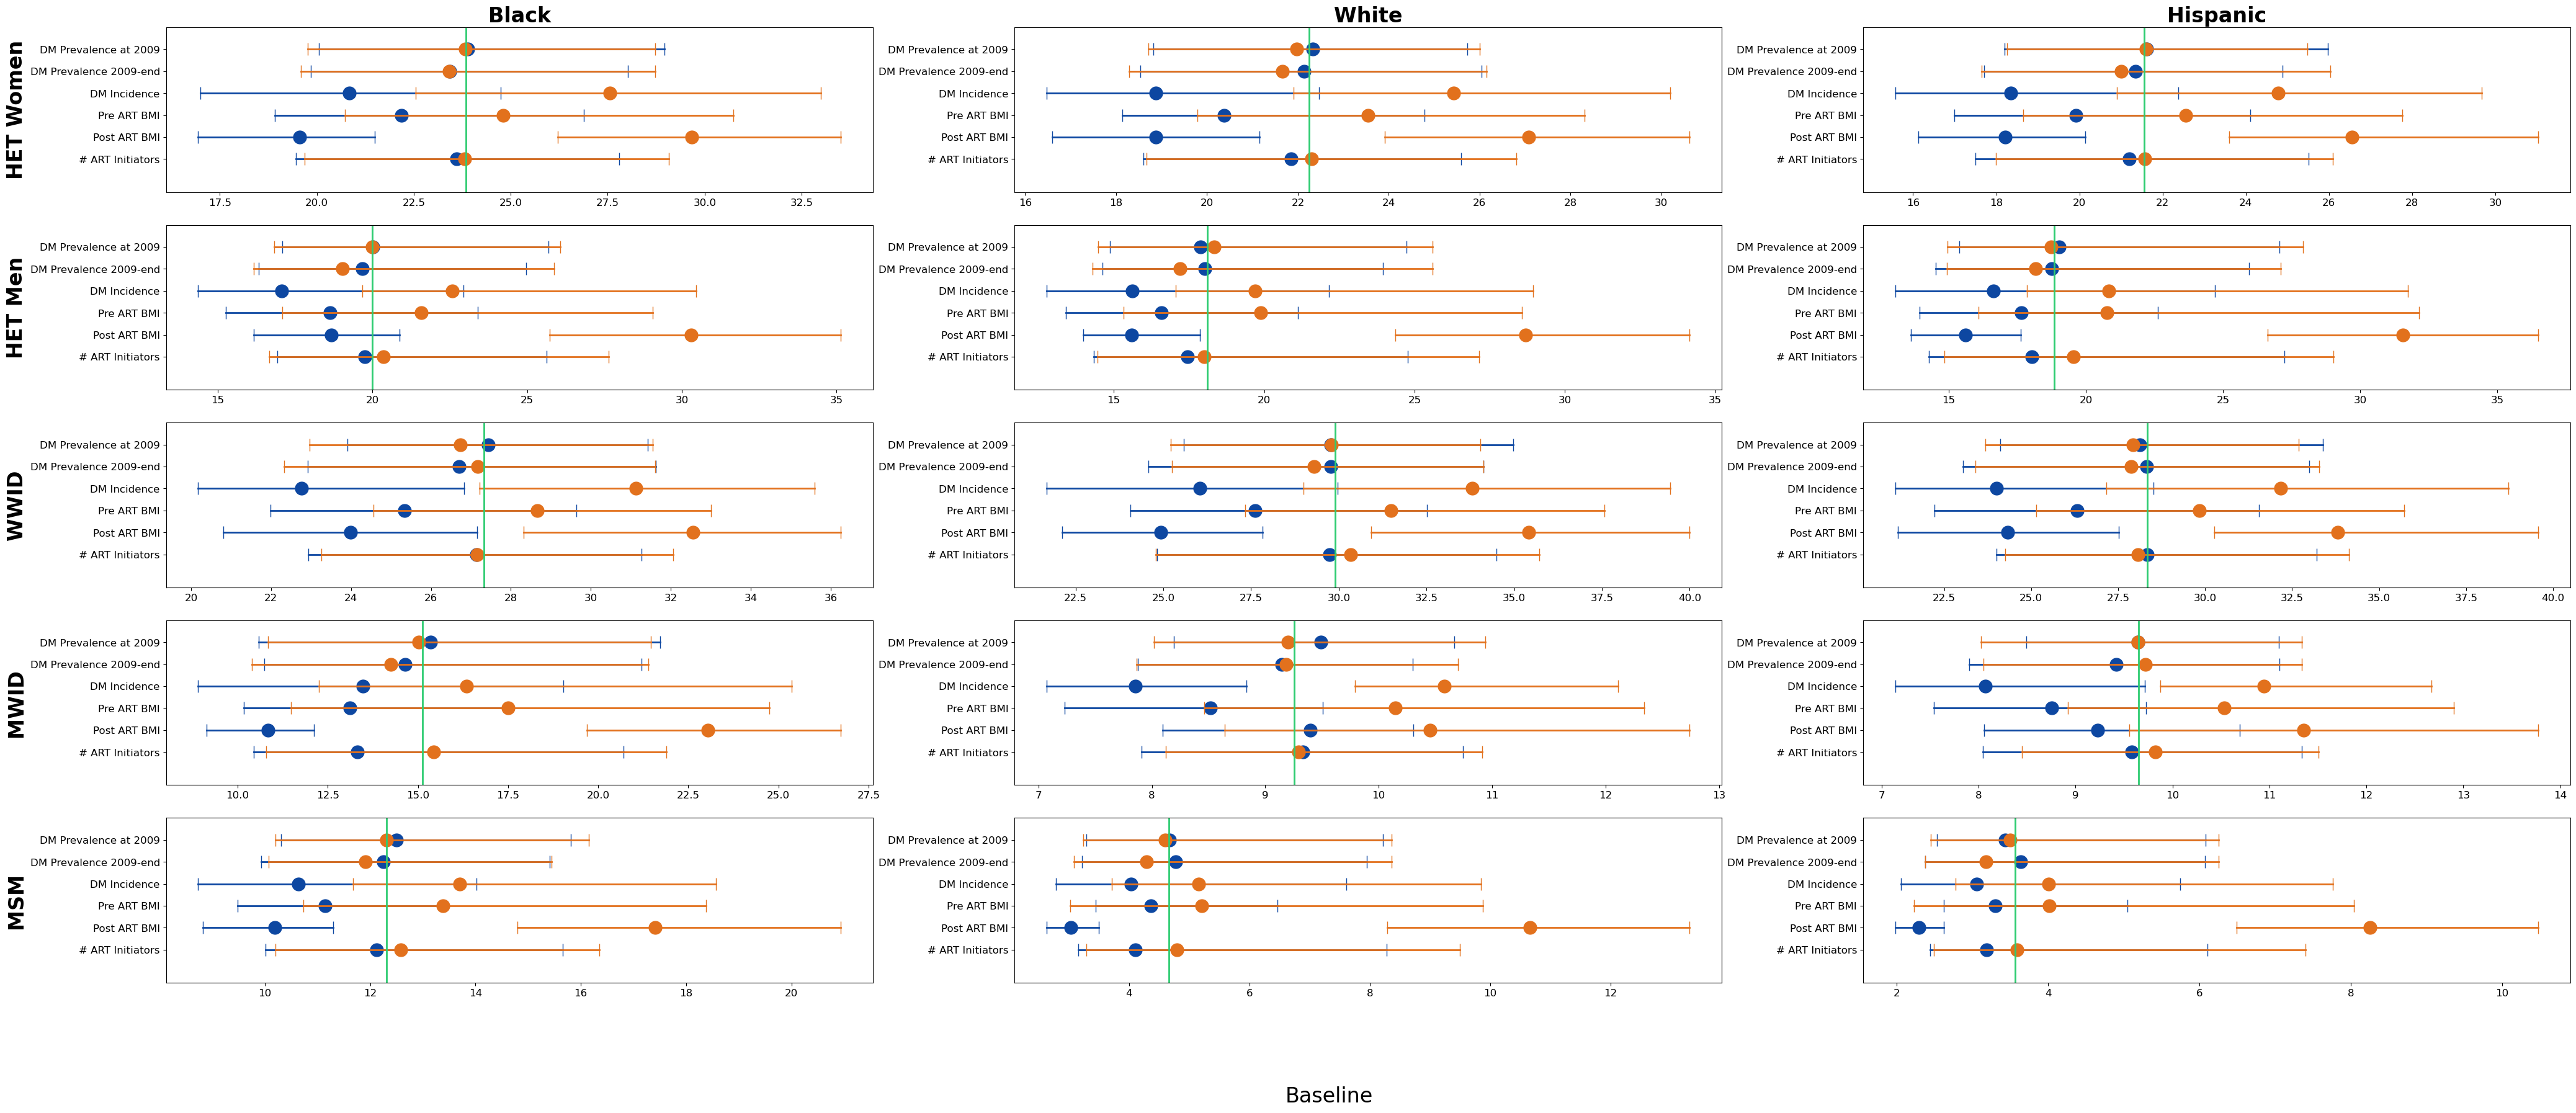

In [32]:
fig = multi_tornado_plot(baseline_tornado_vals, baseline_risk_sa_median, "Baseline")

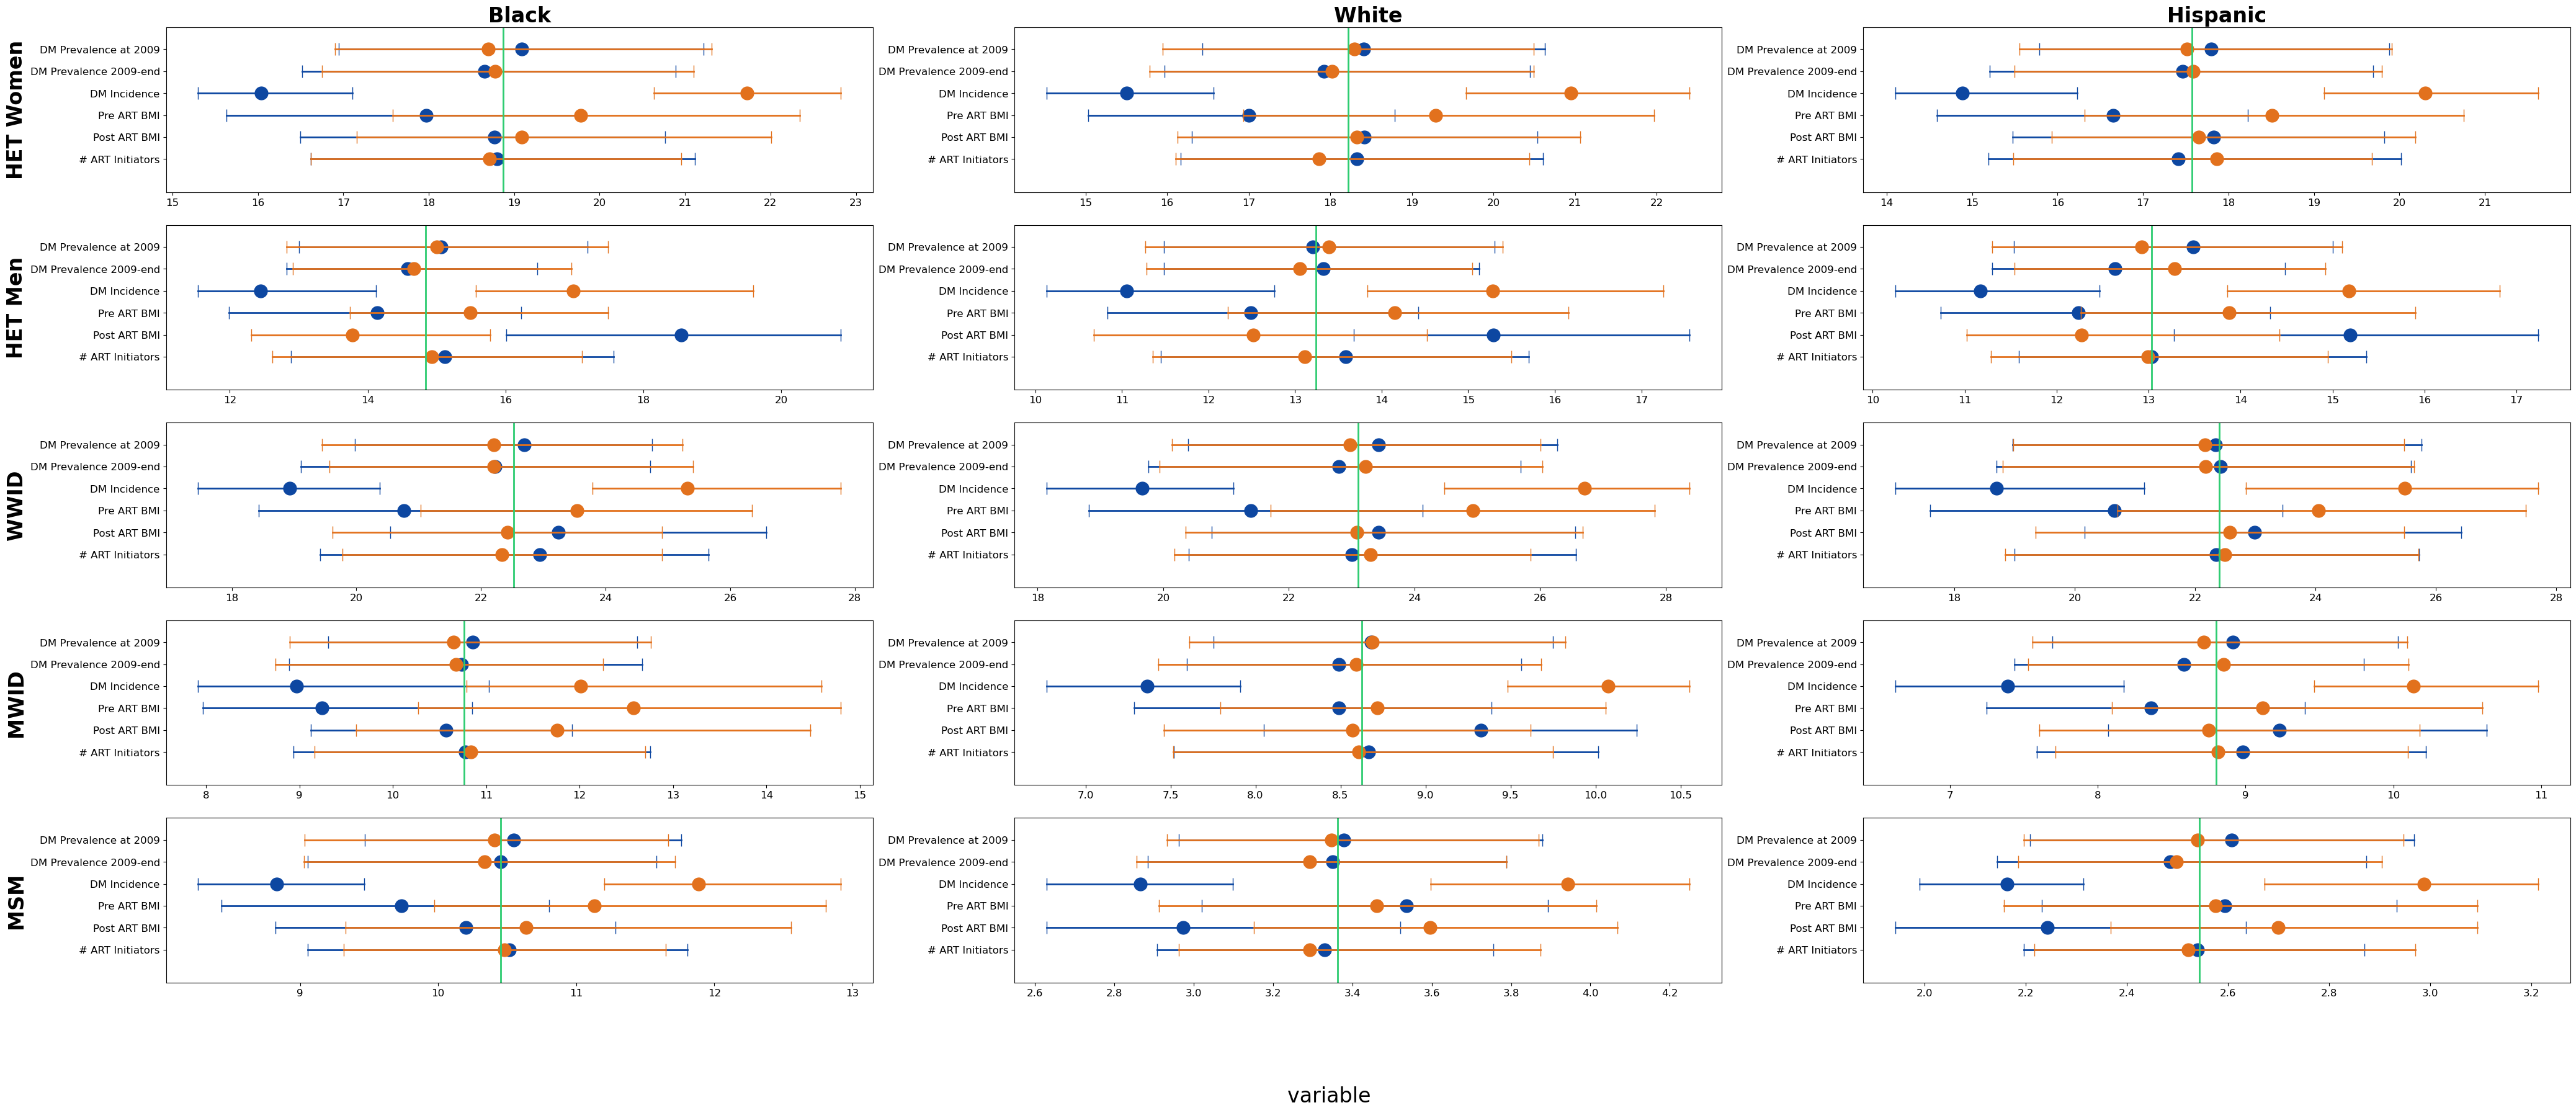

In [33]:
fig = multi_tornado_plot(variable_tornado_vals, variable_risk_sa_median, "variable")

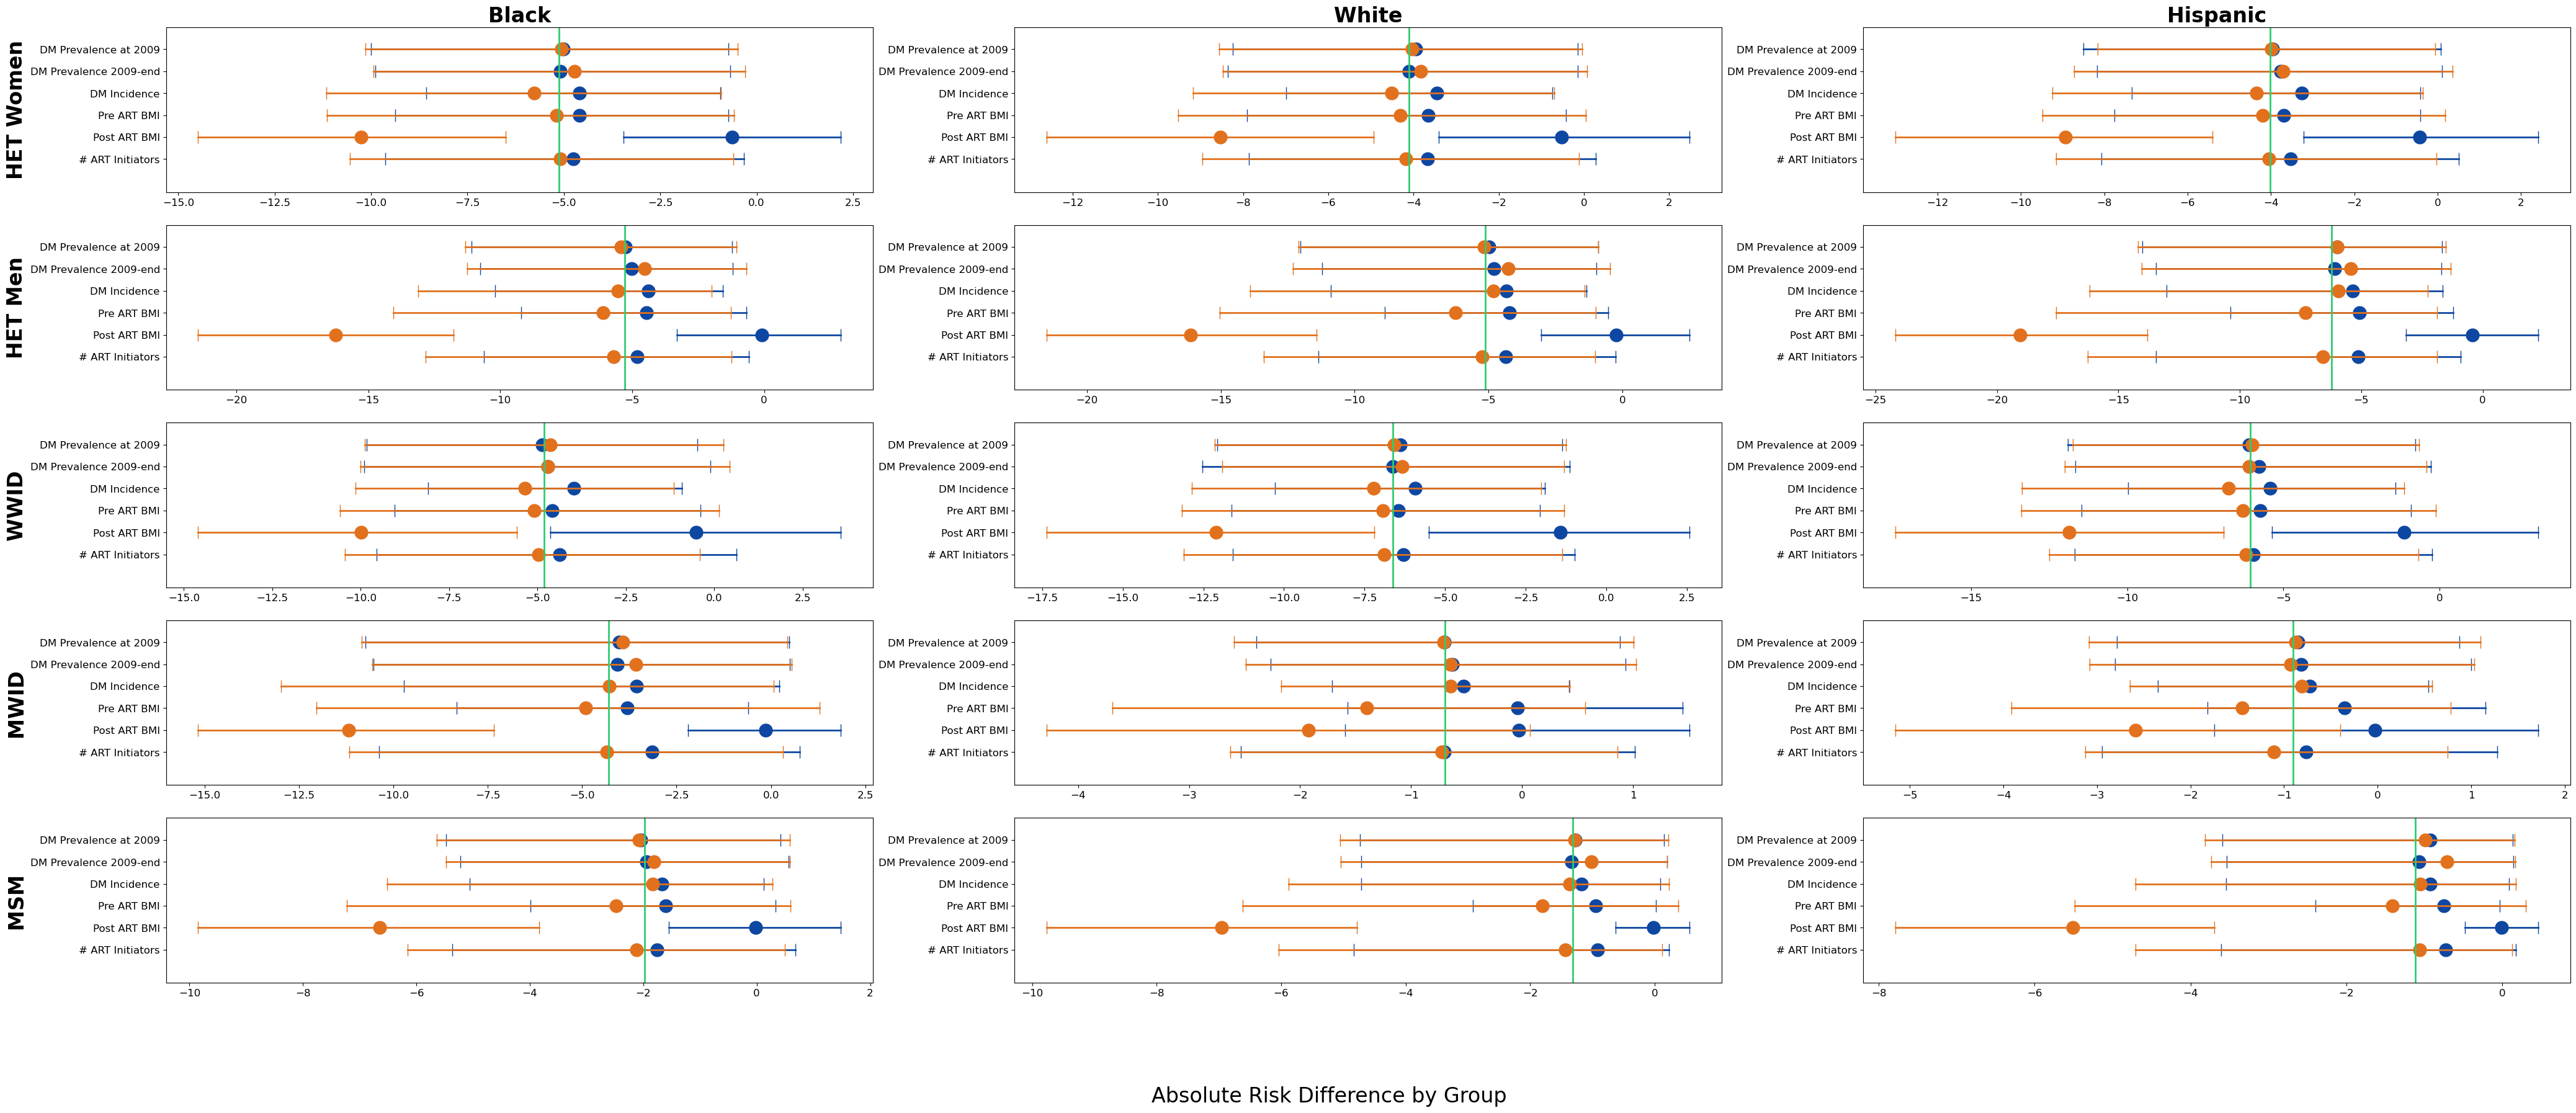

In [34]:
fig = multi_tornado_plot(difference_tornado_vals, baseline_risk_difference_df_sa, "Absolute Risk Difference by Group")
fig.savefig("../out/figs/absolute_group.png", bbox_inches="tight")
difference_tornado_vals.to_csv("../out/figs/absolute_group.csv")
baseline_risk_difference_df_sa.to_csv("../out/figs/absolute_baseline.csv")

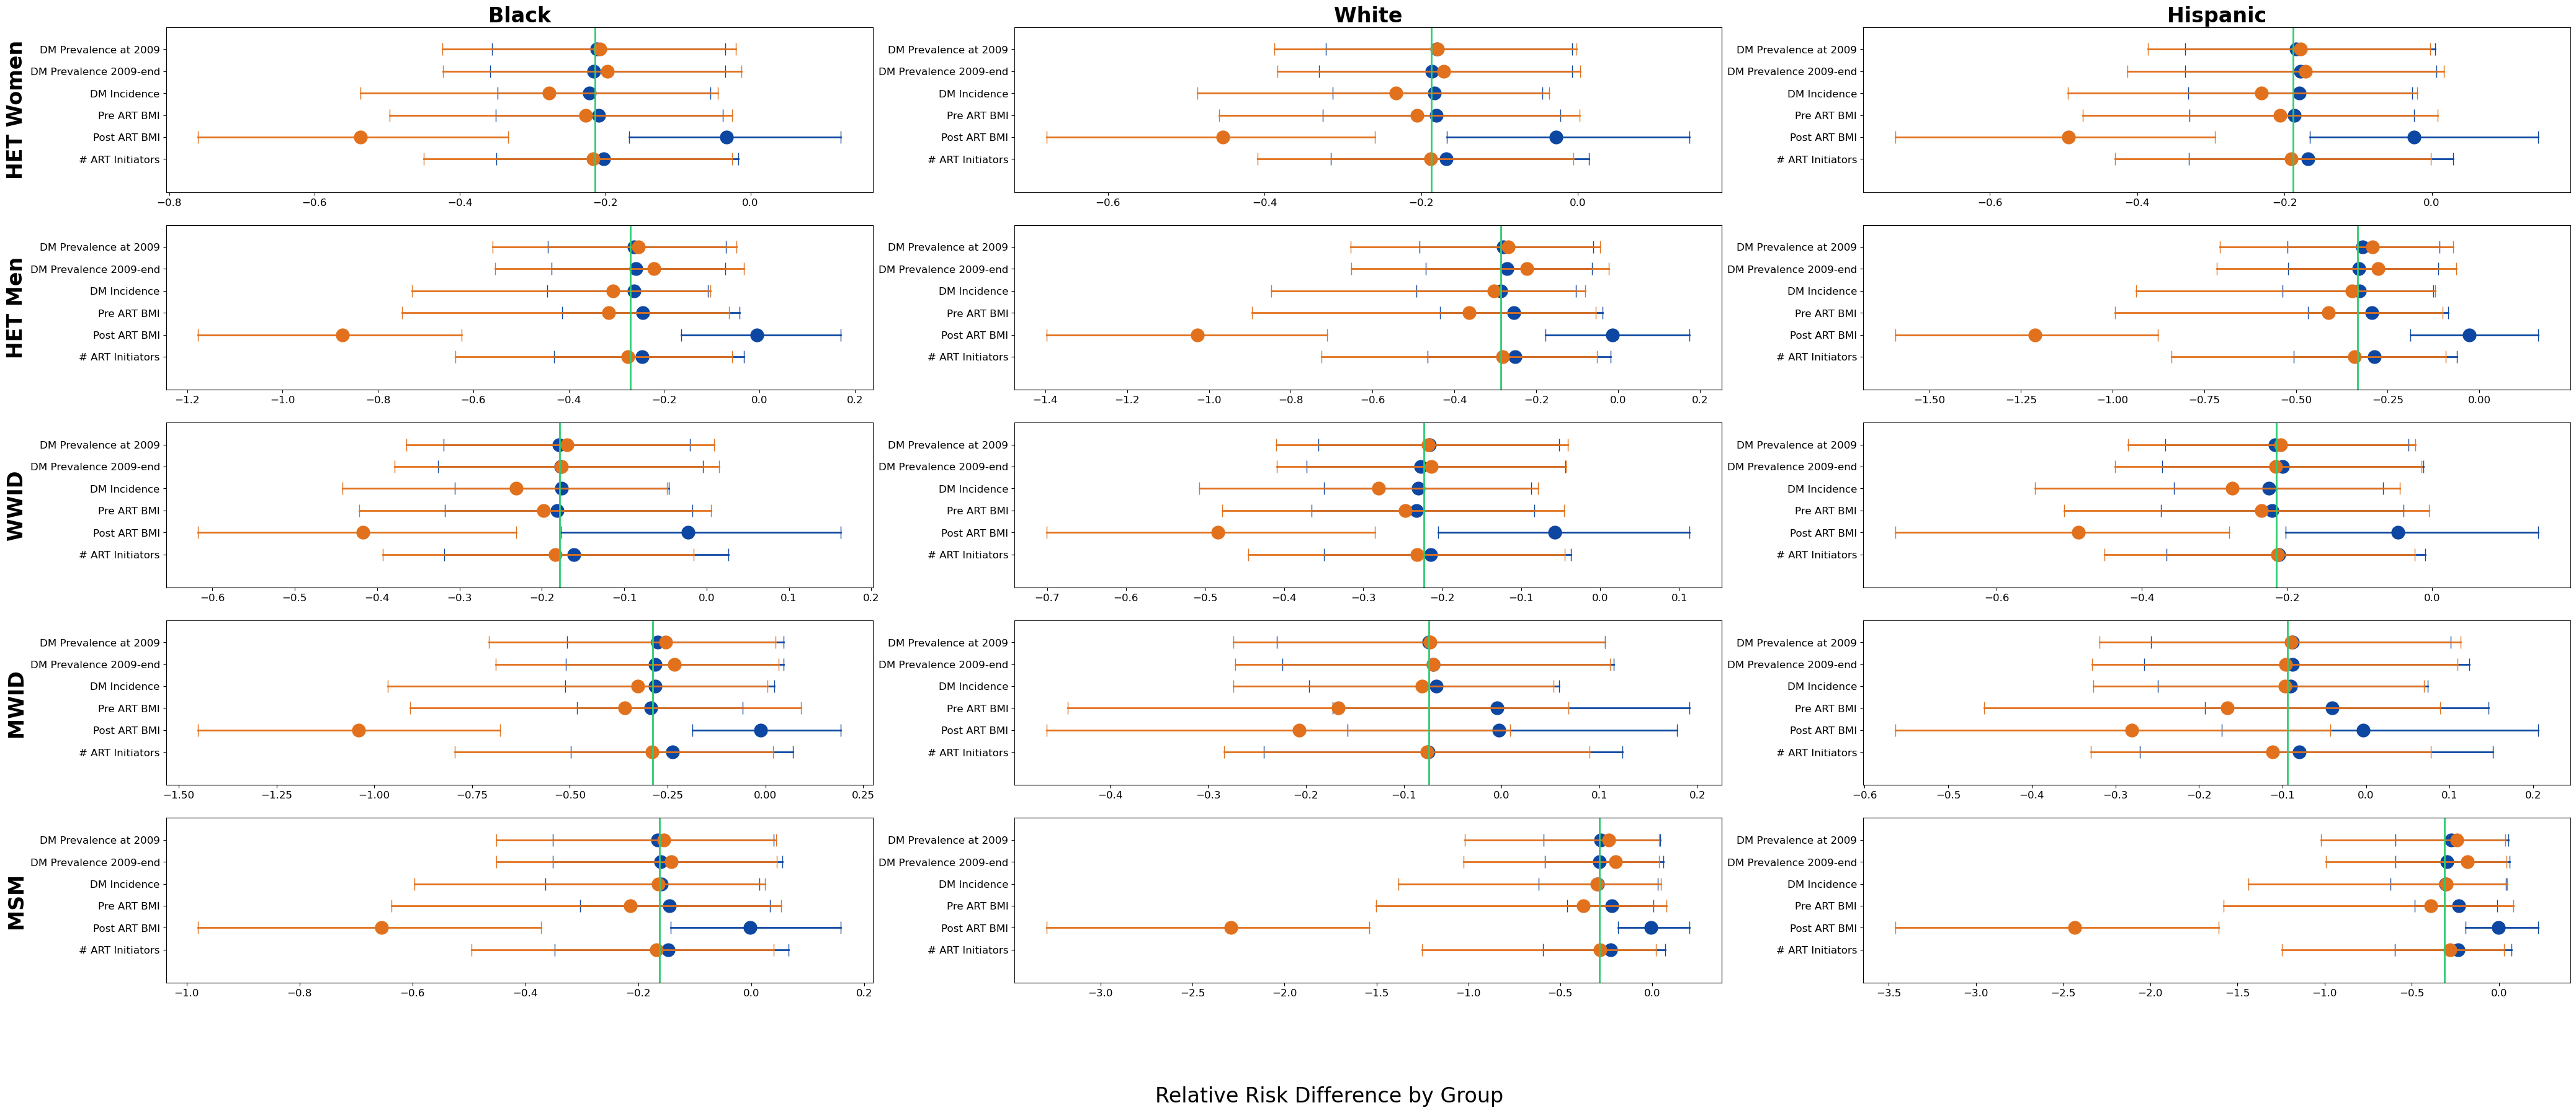

In [35]:
fig = multi_tornado_plot(relative_tornado_vals, baseline_risk_difference_df_sa_relative, "Relative Risk Difference by Group")
fig.savefig("../out/figs/relative_group.png", bbox_inches="tight")
relative_tornado_vals.to_csv("../out/figs/relative_group.csv")
baseline_risk_difference_df_sa_relative.to_csv("../out/figs/relative_baseline.csv")

# Overall

In [36]:
def overall_tornado_plot(tornado_vals, baseline_vals, x_axis_title):
    # create an axis
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    group = "overall"

    group_vals = tornado_vals[tornado_vals['group']==group].reset_index(drop=True)
    
    # plot parameters
    y_tick_label = group_vals['variable']
    ys = range(len(y_tick_label))[::-1]
    
    color_lesser = '#0d47a1'
    color_greater = '#e2711d'
    color_line = '#2ECC71'

    # Data to be visualized
    lesser_value = group_vals.iloc[:,2].values
    greater_value = group_vals.iloc[:,3].values
    base = baseline_vals[baseline_vals['group']==group]['risk'].values[0]

    # Draw bars
    for y, value, value2 in zip(ys, lesser_value, greater_value):
        
        # draw horizontal line markers for the uncertainty around lesser and greater
        # lesser
        ax.plot((value.iloc[0], value.iloc[2]), (y, y), linewidth=2, color=color_lesser, marker='|', markersize=15)
        ax.plot(value.iloc[1], y , 'o', color=color_lesser, markersize=15)
        
        # greater
        ax.plot((value2.iloc[0], value2.iloc[2]), (y, y), linewidth=2, color=color_greater, marker='|', markersize=15)
        ax.plot(value2.iloc[1], y , 'o', color=color_greater, markersize=15)
        
        

    # Add vertical line for median value
    ax.axvline(base, color=color_line, linewidth=2, label='Median value')
    
    # Modify the graph
    ax.set_ylim([-1.5, 6])
    ax.set_yticks(ys)
    ax.set_yticklabels(y_tick_label)
    ax.set_title(group_title_dict[group], fontsize=24, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel(x_axis_title, fontsize=24)
    ax.set_ylabel("Parameter", fontsize=24)
        
    return fig
        

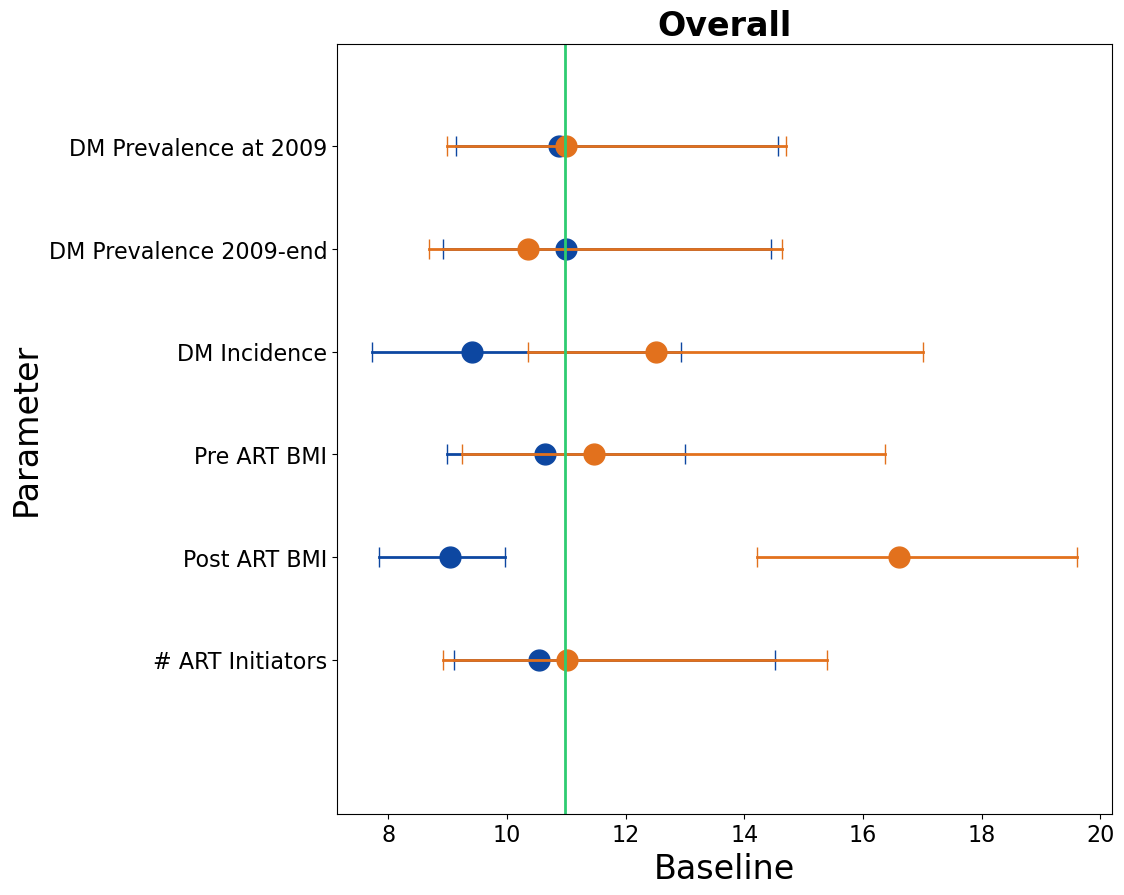

In [37]:
fig = overall_tornado_plot(baseline_tornado_vals, baseline_risk_sa_median, "Baseline")

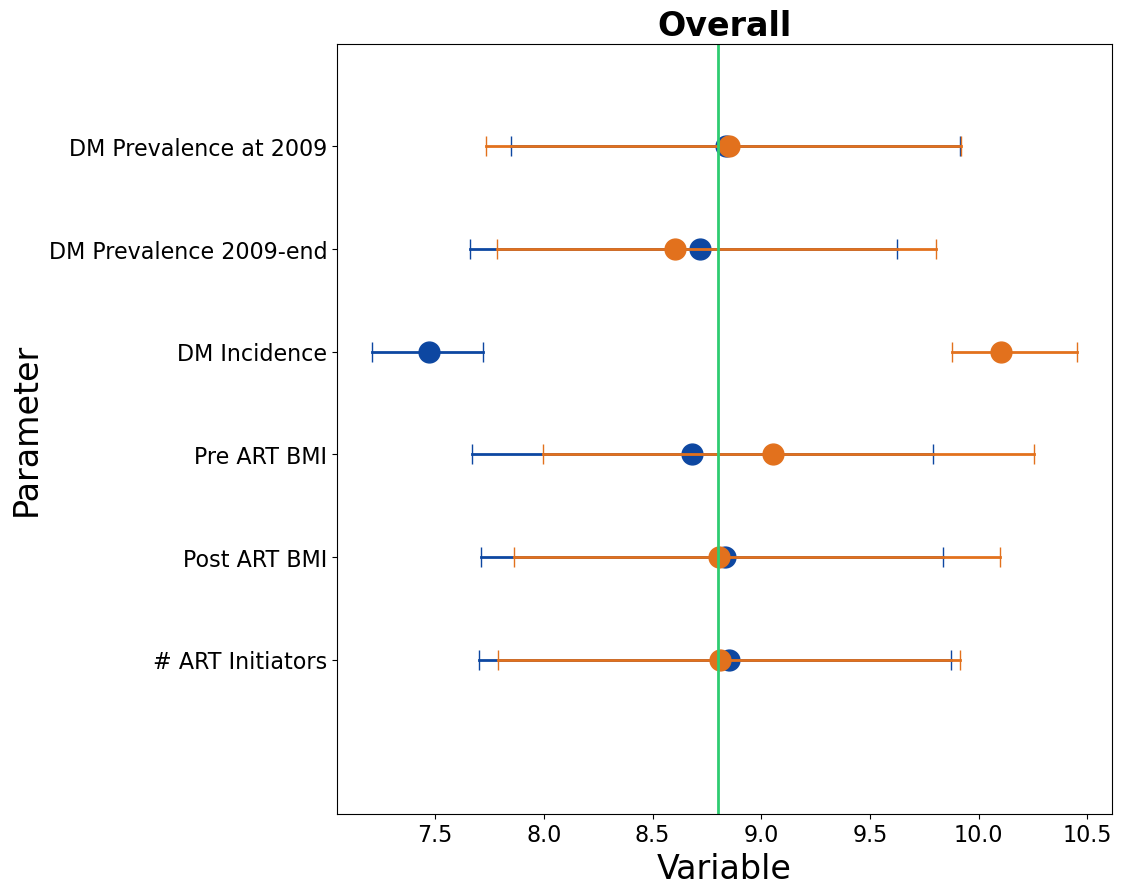

In [38]:
fig = overall_tornado_plot(variable_tornado_vals, variable_risk_sa_median, "Variable")

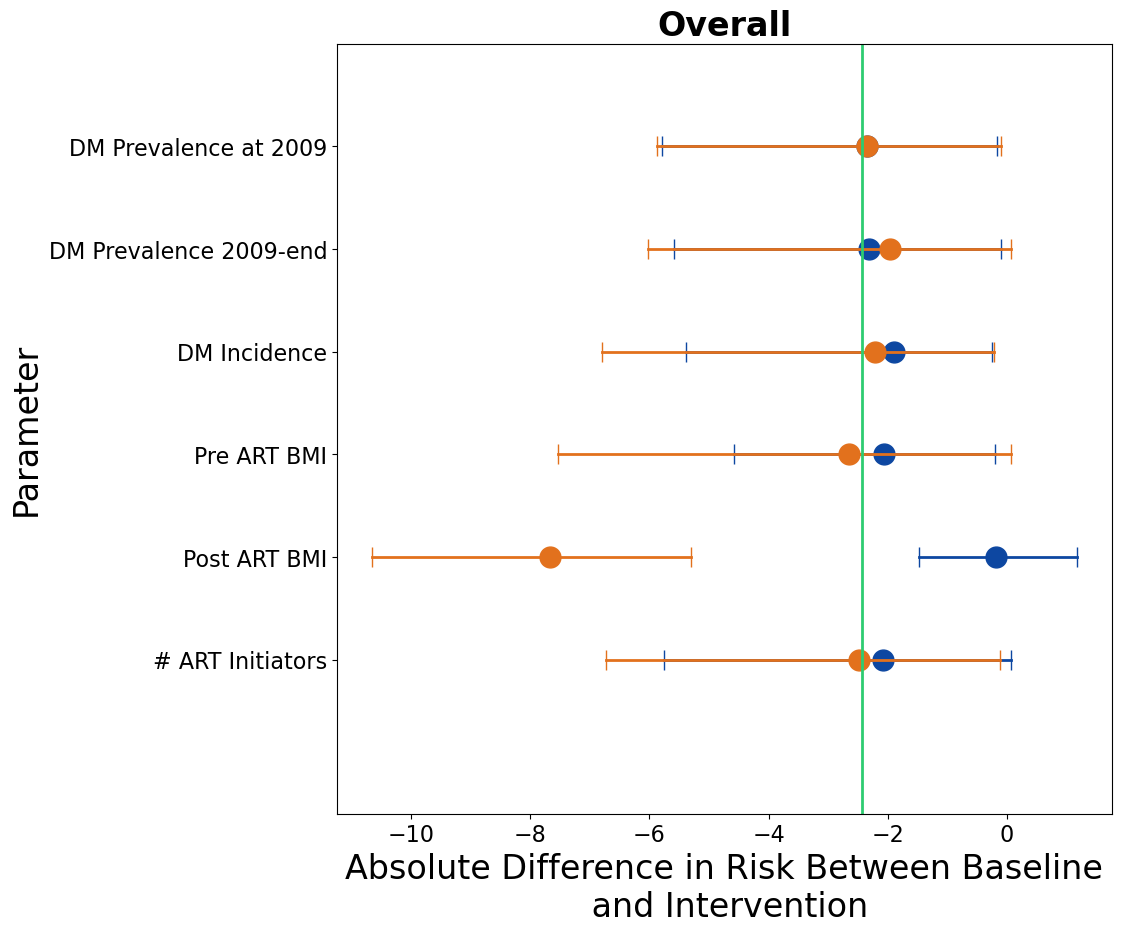

In [39]:
fig = overall_tornado_plot(difference_tornado_vals, baseline_risk_difference_df_sa, "Absolute Difference in Risk Between Baseline\n and Intervention")
fig.savefig("../out/figs/absolute_overall.png", bbox_inches="tight")
difference_tornado_vals.to_csv("../out/figs/absolute_overall.csv")

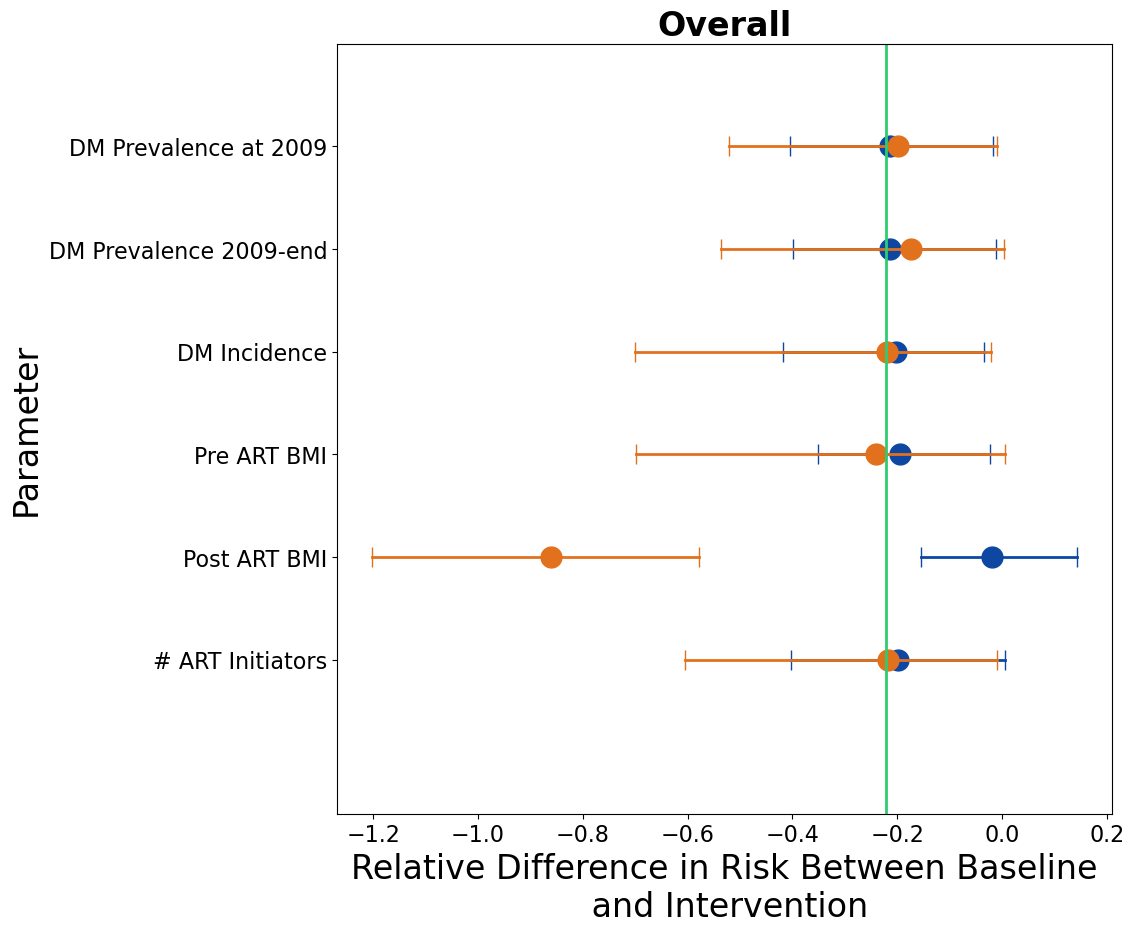

In [40]:
fig = overall_tornado_plot(relative_tornado_vals, baseline_risk_difference_df_sa_relative, "Relative Difference in Risk Between Baseline\n and Intervention")
fig.savefig("../out/figs/relative_overall.png", bbox_inches="tight")
relative_tornado_vals.to_csv("../out/figs/relative_overall.csv")